In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

In [2]:
series_no = '7'
df_prediction = pd.read_csv('./Archiv/series'+series_no+'_Orbit.csv')
df_prediction['date'] = pd.to_datetime(df_prediction['date'])
df_prediction.tail()

,date,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,regression_5,regression,regression_95,seasonality_7_5,seasonality_7,seasonality_7_95,seasonality_365.25_5,seasonality_365.25,seasonality_365.25_95
2187,2021-12-27,3.866603,5.184703,6.523220,3.457050,4.775150,6.113666,0.0,0.0,0.0,0.599893,0.599893,0.599893,-0.190340,-0.190340,-0.190340
2188,2021-12-28,2.857971,4.189619,5.507784,3.462736,4.794384,6.112548,0.0,0.0,0.0,-0.451151,-0.451151,-0.451151,-0.153614,-0.153614,-0.153614
2189,2021-12-29,2.581113,3.888344,5.246656,3.476051,4.783282,6.141595,0.0,0.0,0.0,-0.777927,-0.777927,-0.777927,-0.117011,-0.117011,-0.117011
2190,2021-12-30,2.604731,3.936687,5.292614,3.458381,4.790336,6.146263,0.0,0.0,0.0,-0.773102,-0.773102,-0.773102,-0.080548,-0.080548,-0.080548
2191,2021-12-31,2.974002,4.282032,5.611495,3.475773,4.783803,6.113265,0.0,0.0,0.0,-0.457530,-0.457530,-0.457530,-0.044241,-0.044241,-0.044241


In [3]:
df_prediction['trendN'] =  (df_prediction['trend'] - df_prediction['trend'] .min()) / (df_prediction['trend'].max() - df_prediction['trend'].min()) + 1
df_prediction['yearlyN'] = (df_prediction['seasonality_365.25'] - df_prediction['seasonality_365.25'].min()) / (df_prediction['seasonality_365.25'].max() - df_prediction['seasonality_365.25'].min()) 
df_prediction['weeklyN'] = (df_prediction['seasonality_7'] - df_prediction['seasonality_7'].min()) / (df_prediction['seasonality_7'].max() - df_prediction['seasonality_7'].min()) 
df_prediction.head(10)      

,date,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,regression_5,regression,regression_95,seasonality_7_5,seasonality_7,seasonality_7_95,seasonality_365.25_5,seasonality_365.25,seasonality_365.25_95,trendN,yearlyN,weeklyN
0,2016-01-01,3.377705,4.708540,6.022813,3.861635,5.192470,6.506743,0.0,0.0,0.0,-0.457555,-0.457555,-0.457555,-0.026375,-0.026375,-0.026375,1.205492,0.559845,0.155514
1,2016-01-02,4.479089,5.782652,7.091915,3.892081,5.195644,6.504907,0.0,0.0,0.0,0.577565,0.577565,0.577565,0.009444,0.009444,0.009444,1.206968,0.569846,0.657938
2,2016-01-03,5.208056,6.523924,7.836921,3.880692,5.196560,6.509557,0.0,0.0,0.0,1.282298,1.282298,1.282298,0.045066,0.045066,0.045066,1.207394,0.579793,1.000000
3,2016-01-04,4.579921,5.896147,7.204734,3.899515,5.215741,6.524328,0.0,0.0,0.0,0.599930,0.599930,0.599930,0.080476,0.080476,0.080476,1.216314,0.589681,0.668794
4,2016-01-05,3.551443,4.877589,6.209213,3.886925,5.213072,6.544696,0.0,0.0,0.0,-0.451142,-0.451142,-0.451142,0.115659,0.115659,0.115659,1.215072,0.599505,0.158627
5,2016-01-06,3.256339,4.582859,5.895091,3.883692,5.210211,6.522444,0.0,0.0,0.0,-0.777953,-0.777953,-0.777953,0.150601,0.150601,0.150601,1.213742,0.609262,0.000000
6,2016-01-07,3.285652,4.608060,5.928228,3.873509,5.195917,6.516085,0.0,0.0,0.0,-0.773143,-0.773143,-0.773143,0.185286,0.185286,0.185286,1.207095,0.618947,0.002335
7,2016-01-08,3.651808,4.964784,6.288218,3.889662,5.202639,6.526072,0.0,0.0,0.0,-0.457555,-0.457555,-0.457555,0.219701,0.219701,0.219701,1.210221,0.628557,0.155514
8,2016-01-09,4.736554,6.045667,7.339733,3.905158,5.214271,6.508337,0.0,0.0,0.0,0.577565,0.577565,0.577565,0.253831,0.253831,0.253831,1.215630,0.638087,0.657938
9,2016-01-10,5.417065,6.757743,8.113701,3.847104,5.187781,6.543739,0.0,0.0,0.0,1.282298,1.282298,1.282298,0.287663,0.287663,0.287663,1.203311,0.647534,1.000000


<AxesSubplot:xlabel='date'>

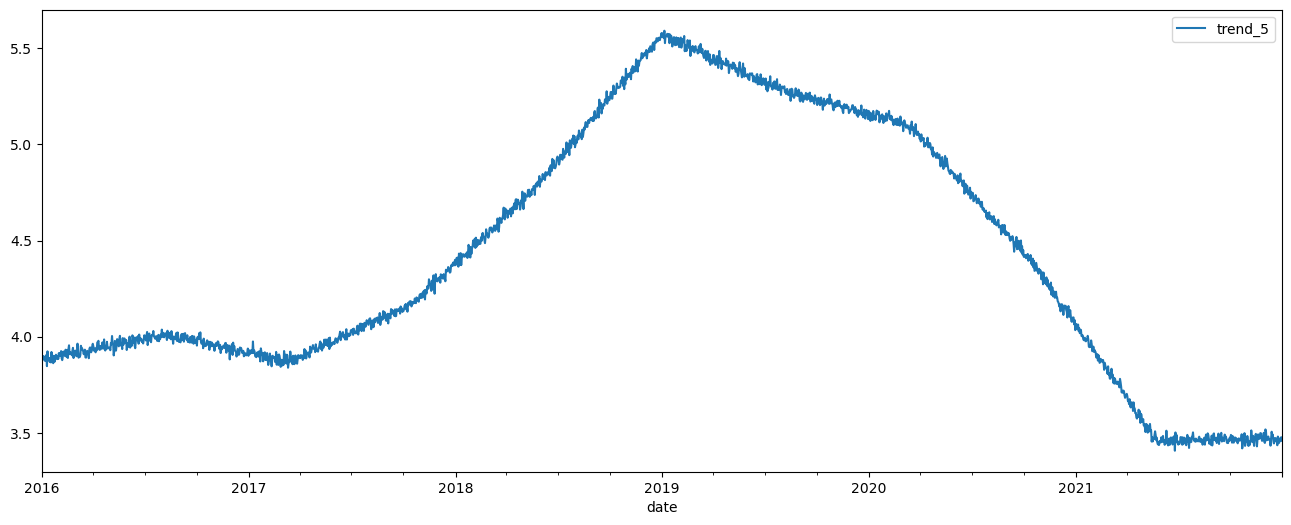

In [4]:
df_prediction.plot(y ='trend_5', x ='date', figsize=(16,6))
#plt.xlim('2019-03-01','2019-12-31')
#plt.ylim(1.0,1.01)

In [5]:
# Load True Values
df_true = pd.read_csv('../series4_weekly_complete.csv')
df_true.head()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise
0,2016-01-01,0.481635,6.201858,1.000000,0.561898,1.5,1.0,-0.11,1.470435,1.055334
1,2016-01-02,0.467745,6.051578,1.017213,0.564405,1.5,1.0,-0.24,1.470434,0.879749
2,2016-01-03,0.493020,6.347860,1.034422,0.566911,1.5,1.0,-0.39,1.470431,1.150736
3,2016-01-04,0.485388,6.268917,1.051620,0.569415,1.5,1.0,-0.56,1.470429,1.046512
4,2016-01-05,0.383887,4.649264,1.068802,0.571917,0.5,0.0,-0.75,1.470426,0.872029


# MAE FOR Yearly SEASONALITY

In [6]:
# Standardize Yearly Pred 

mean = sum(df_prediction['yearlyN']) / len(df_prediction)
standard_deviation = math.sqrt( sum((df_prediction['yearlyN'] - mean)**2 ) / len(df_prediction))
df_prediction['yearlyS']= (df_prediction['yearlyN'] - mean) / standard_deviation

df_prediction.head(2)

,date,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,regression_5,regression,regression_95,seasonality_7_5,seasonality_7,seasonality_7_95,seasonality_365.25_5,seasonality_365.25,seasonality_365.25_95,trendN,yearlyN,weeklyN,yearlyS
0,2016-01-01,3.377705,4.708540,6.022813,3.861635,5.192470,6.506743,0.0,0.0,0.0,-0.457555,-0.457555,-0.457555,-0.026375,-0.026375,-0.026375,1.205492,0.559845,0.155514,-0.020599
1,2016-01-02,4.479089,5.782652,7.091915,3.892081,5.195644,6.504907,0.0,0.0,0.0,0.577565,0.577565,0.577565,0.009444,0.009444,0.009444,1.206968,0.569846,0.657938,0.007748


In [7]:
# Standardize Yearly True

mean = sum(df_true['trueYearlyN']) / len(df_true)
standard_deviation = math.sqrt( sum((df_true['trueYearlyN'] - mean)**2 ) / len(df_true))
df_true['trueYearlyS']= (df_true['trueYearlyN'] - mean) / standard_deviation

df_true.head(2)

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise,trueYearlyS
0,2016-01-01,0.481635,6.201858,1.000000,0.561898,1.5,1.0,-0.11,1.470435,1.055334,-0.000008
1,2016-01-02,0.467745,6.051578,1.017213,0.564405,1.5,1.0,-0.24,1.470434,0.879749,0.017803


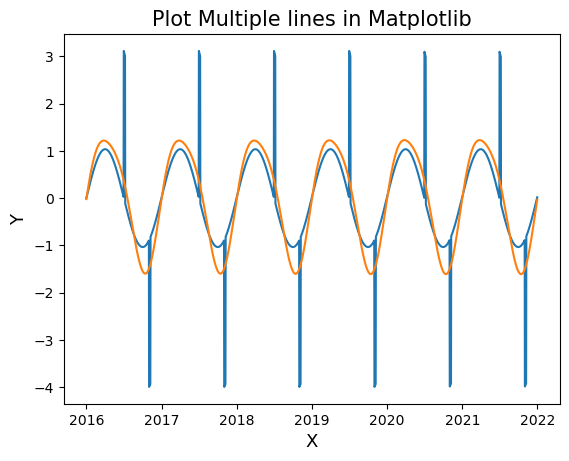

In [8]:
#Figure to compare actual and predictat yearly seasonality  

import matplotlib.pyplot as plt 

y1 = df_true['trueYearlyS']
y2 = df_prediction['yearlyS']
x1 = pd.to_datetime(df_true['date'])
x2 = pd.to_datetime(df_prediction['date'])


plt.plot(x1, y1)
plt.plot(x2, y2)

plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
#plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
plt.show()

### MAE

In [9]:
y_true = df_true['trueYearlyS']
y_pred = df_prediction['yearlyS'][0:2192]
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_true, y_pred))

Mean Absolute Error:

0.36730878358021635


### RMSE

In [10]:
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

Root Mean Square Error:

0.6002309497939688


# MAE FOR Weekly SEASONALITY

In [11]:
# Standardize weekly Pred 

mean = sum(df_prediction['weeklyN']) / len(df_prediction)
standard_deviation = math.sqrt( sum((df_prediction['weeklyN'] - mean)**2 ) / len(df_prediction))
df_prediction['weeklyS']= (df_prediction['weeklyN'] - mean) / standard_deviation

df_prediction.tail()

,date,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,regression_5,regression,regression_95,...,seasonality_7,seasonality_7_95,seasonality_365.25_5,seasonality_365.25,seasonality_365.25_95,trendN,yearlyN,weeklyN,yearlyS,weeklyS
2187,2021-12-27,3.866603,5.184703,6.523220,3.457050,4.775150,6.113666,0.0,0.0,0.0,...,0.599893,0.599893,-0.190340,-0.190340,-0.190340,1.011424,0.514061,0.668776,-0.150359,0.798621
2188,2021-12-28,2.857971,4.189619,5.507784,3.462736,4.794384,6.112548,0.0,0.0,0.0,...,-0.451151,-0.451151,-0.153614,-0.153614,-0.153614,1.020369,0.524316,0.158623,-0.121294,-0.600118
2189,2021-12-29,2.581113,3.888344,5.246656,3.476051,4.783282,6.141595,0.0,0.0,0.0,...,-0.777927,-0.777927,-0.117011,-0.117011,-0.117011,1.015206,0.534536,0.000012,-0.092327,-1.034995
2190,2021-12-30,2.604731,3.936687,5.292614,3.458381,4.790336,6.146263,0.0,0.0,0.0,...,-0.773102,-0.773102,-0.080548,-0.080548,-0.080548,1.018486,0.544718,0.002355,-0.063471,-1.028573
2191,2021-12-31,2.974002,4.282032,5.611495,3.475773,4.783803,6.113265,0.0,0.0,0.0,...,-0.457530,-0.457530,-0.044241,-0.044241,-0.044241,1.015448,0.554856,0.155526,-0.034738,-0.608607


In [12]:
# Standardize weekly True

mean = sum(df_true['trueMonthlyN']) / len(df_true)
standard_deviation = math.sqrt( sum((df_true['trueMonthlyN'] - mean)**2 ) / len(df_true))
df_true['trueWeeklyS']= (df_true['trueMonthlyN'] - mean) / standard_deviation

df_true.tail()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise,trueYearlyS,trueWeeklyS
2187,2021-12-27,0.458799,4.782127,0.948380,0.554382,1.5,1.0,-31677.25,1.006832,1.310189,-0.053422,1.154086
2188,2021-12-28,0.306463,3.035988,0.965578,0.556886,0.5,0.0,-31793.80,1.005126,0.557771,-0.035626,-0.866486
2189,2021-12-29,0.354178,3.577583,0.982787,0.559392,0.5,0.0,-31910.45,1.003419,1.086309,-0.017820,-0.866486
2190,2021-12-30,0.342260,3.439193,1.000000,0.561898,0.5,0.0,-32027.20,1.001710,0.934917,-0.000008,-0.866486
2191,2021-12-31,0.360407,3.643537,1.017213,0.564405,0.5,0.0,-32144.05,1.000000,1.126324,0.017803,-0.866486


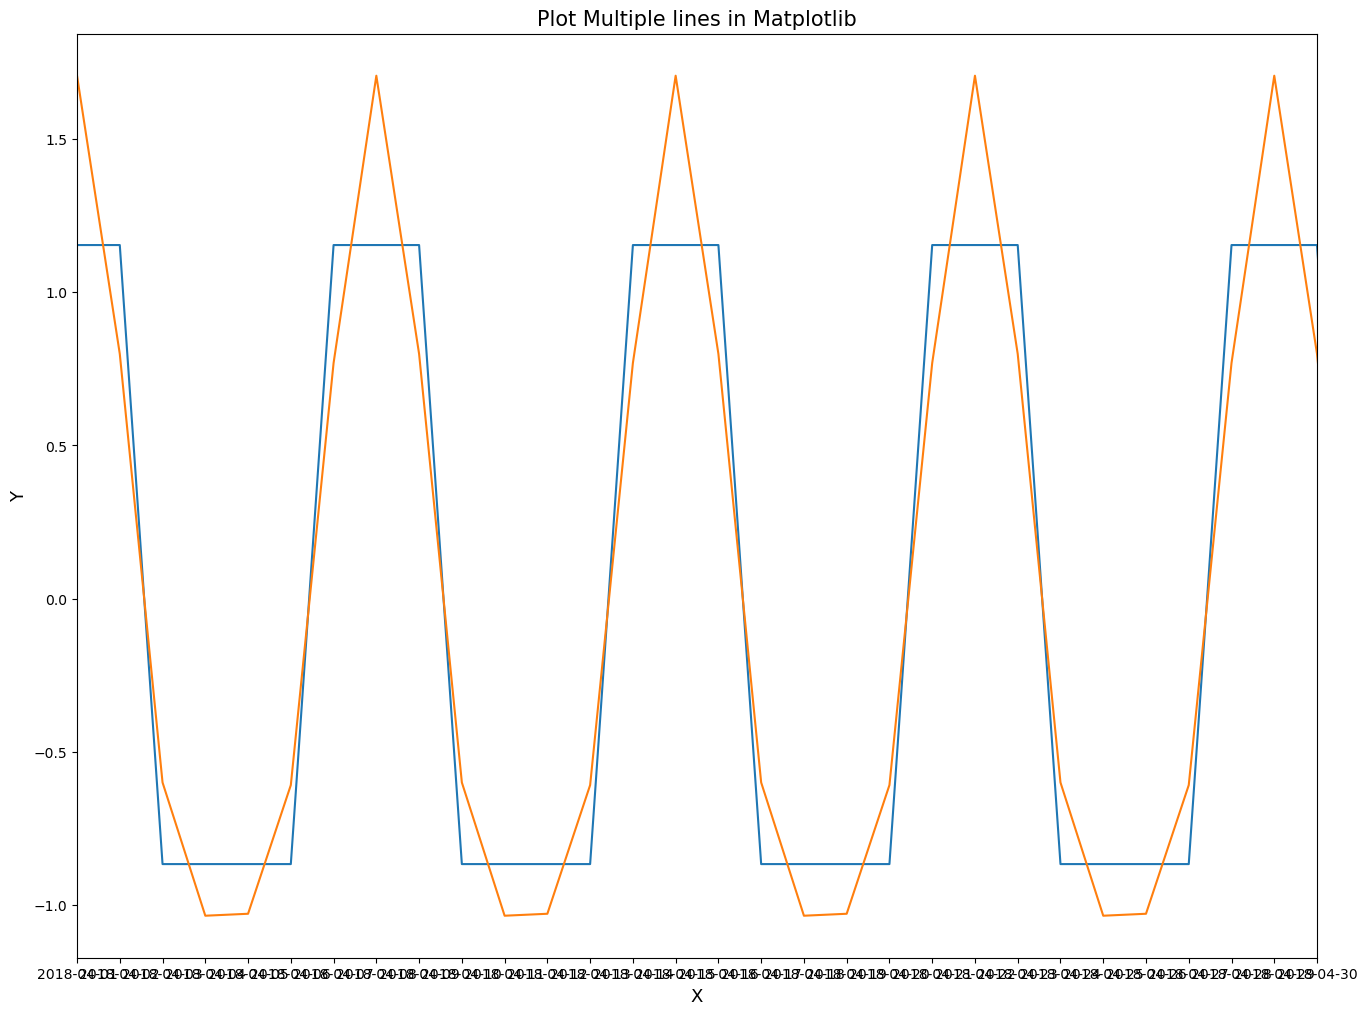

In [13]:
#Figure to compare actual and predictat weekly seasonality  

import matplotlib.pyplot as plt 

y1 = df_true['trueWeeklyS']
y2 = df_prediction['weeklyS']
x1 = df_true['date']
x2 = pd.to_datetime(df_prediction['date'])


plt.plot(x1, y1)
plt.plot(x1, y2)

plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
#plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
plt.xlim('2018-04-01','2018-04-30')
plt.show()

### MAE Weekly

In [14]:
y_true = df_true['trueWeeklyS']
y_pred = df_prediction['weeklyS']
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_true, y_pred))

Mean Absolute Error:

0.3075474291686865


### RMSE Weekly

In [15]:
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

Root Mean Square Error:

0.3342049488450666


# MAE FOR TREND 

In [16]:
# Standardize Trend Pred 

mean = sum(df_prediction['trendN']) / len(df_prediction)
standard_deviation = math.sqrt( sum((df_prediction['trendN'] - mean)**2 ) / len(df_prediction))
df_prediction['trendS']= (df_prediction['trendN'] - mean) / standard_deviation

df_prediction.head(2)

,date,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,regression_5,regression,regression_95,...,seasonality_7_95,seasonality_365.25_5,seasonality_365.25,seasonality_365.25_95,trendN,yearlyN,weeklyN,yearlyS,weeklyS,trendS
0,2016-01-01,3.377705,4.708540,6.022813,3.861635,5.192470,6.506743,0.0,0.0,0.0,...,-0.457555,-0.026375,-0.026375,-0.026375,1.205492,0.559845,0.155514,-0.020599,-0.608641,-0.850458
1,2016-01-02,4.479089,5.782652,7.091915,3.892081,5.195644,6.504907,0.0,0.0,0.0,...,0.577565,0.009444,0.009444,0.009444,1.206968,0.569846,0.657938,0.007748,0.768906,-0.845603


In [17]:
# Standardize Trend True 

mean = sum(df_true['trueTrendN']) / len(df_true)
standard_deviation = math.sqrt( sum((df_true['trueTrendN'] - mean)**2 ) / len(df_true))
df_true['trueTrendS']= (df_true['trueTrendN'] - mean) / standard_deviation

df_true.head(2)

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise,trueYearlyS,trueWeeklyS,trueTrendS
0,2016-01-01,0.481635,6.201858,1.000000,0.561898,1.5,1.0,-0.11,1.470435,1.055334,-0.000008,1.154086,-0.594877
1,2016-01-02,0.467745,6.051578,1.017213,0.564405,1.5,1.0,-0.24,1.470434,0.879749,0.017803,1.154086,-0.594885


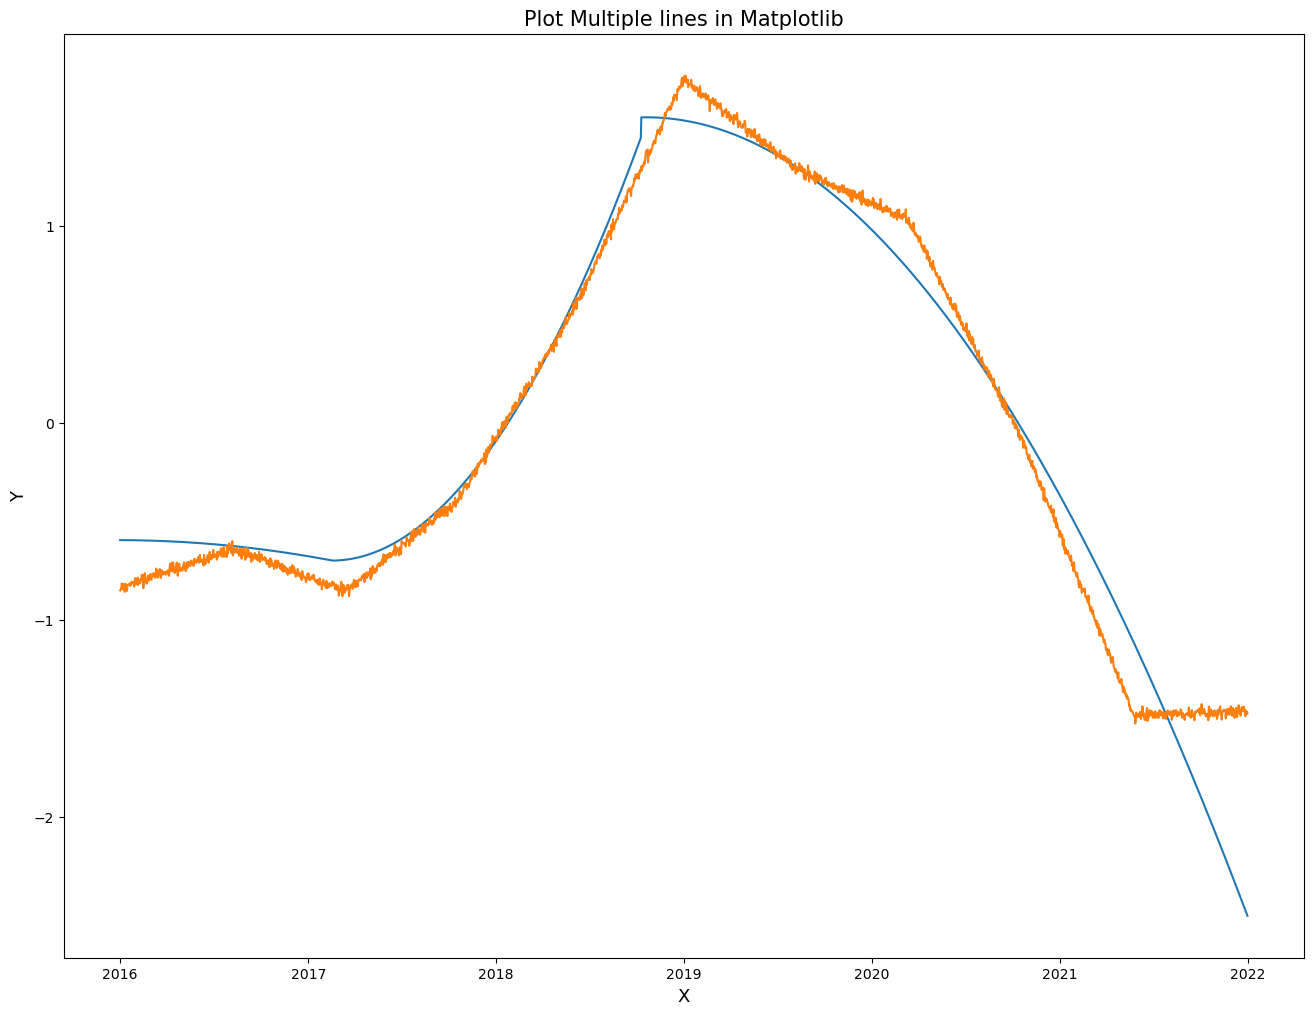

In [18]:
import matplotlib.pyplot as plt 

y1 = df_true['trueTrendS']
y2 = df_prediction['trendS']
x1 = pd.to_datetime(df_true['date'])
x2 = pd.to_datetime(df_prediction['date'])


plt.plot(x1, y1)
plt.plot(x2, y2)

plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
#plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
plt.show()

### MAE Trend

In [19]:
y_true = df_true['trueTrendS']
y_pred = df_prediction['trendS'][0:2192]
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_true, y_pred))

Mean Absolute Error:

0.13187944083533315


### RMSE Trend

In [20]:
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

Root Mean Square Error:

0.2044553985437972
